**Import Libraries**



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as pyplot
sns.set(style='white',color_codes=True)

In [5]:
bike_data=pd.read_csv("/content/drive/MyDrive/Dataset/SeoulBikeData.csv")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
bike_data.head()


,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
bike_data.shape

(8760, 14)

**Step 1: Exploratry Data Analysis and Preprocessing**

In [9]:
bike_data.dtypes

Date                         object
Rented Bike Count             int64
Hour                          int64
Temperature(C)              float64
Humidity(%)                   int64
Wind speed (m/s)            float64
Visibility (10m)              int64
Dew point temperature(C)    float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
Seasons                      object
Holiday                      object
Functioning Day              object
dtype: object

In [10]:
bike_data.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


**Verify that there are no missing Values**

In [11]:
miss_val=bike_data.isna().sum()
miss_val

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

**We Convert as Datetime the series 'Date'**

In [12]:
from datetime import datetime
bike_data.Date=pd.to_datetime(bike_data.Date)
bike_data.info()
bike_data['Month']=pd.DatetimeIndex(bike_data['Date']).month
bike_data['Year']=pd.DatetimeIndex(bike_data['Date']).year
bike_data['days']=pd.DatetimeIndex(bike_data['Date']).day
bike_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(C)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,days
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30


Outlier Analysis:


<function matplotlib.pyplot.show>

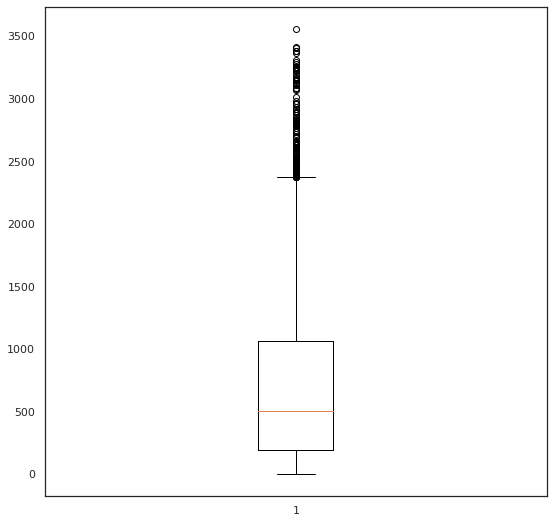

In [13]:
print("Outlier Analysis:")
plt.figure(figsize=(9,9))
plt.boxplot(bike_data['Rented Bike Count'])
plt.show

Check For Numerical Features

In [14]:
df_numeric=bike_data.select_dtypes(include=np.number)
df_numeric.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Month',
       'Year', 'days'],
      dtype='object')

**Check For Categorical Values**

In [16]:
df_cat=bike_data.select_dtypes(include='object')
print("Categorical Values:",bike_data.head())

Categorical Values:         Date  Rented Bike Count  Hour  ...  Month  Year  days
0 2017-01-12                254     0  ...      1  2017    12
1 2017-01-12                204     1  ...      1  2017    12
2 2017-01-12                173     2  ...      1  2017    12
3 2017-01-12                107     3  ...      1  2017    12
4 2017-01-12                 78     4  ...      1  2017    12

[5 rows x 17 columns]


In [17]:
#Create Dummies of Categorical Features
dummies_cat=pd.get_dummies(df_cat,drop_first=True)
#Concatenate Both Numerical & Categorical 
df1=pd.concat([df_numeric,dummies_cat],axis='columns')

In [18]:
df1.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Year,days,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,2017,12,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,2017,12,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,2017,12,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,2017,12,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,2017,12,0,0,1,1,1


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   int64  
 1   Hour                      8760 non-null   int64  
 2   Temperature(C)            8760 non-null   float64
 3   Humidity(%)               8760 non-null   int64  
 4   Wind speed (m/s)          8760 non-null   float64
 5   Visibility (10m)          8760 non-null   int64  
 6   Dew point temperature(C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)   8760 non-null   float64
 8   Rainfall(mm)              8760 non-null   float64
 9   Snowfall (cm)             8760 non-null   float64
 10  Month                     8760 non-null   int64  
 11  Year                      8760 non-null   int64  
 12  days                      8760 non-null   int64  
 13  Seasons_Spring            8760 non-null   uint8  
 14  Seasons_

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7a7f54450>,
      dtype=object)

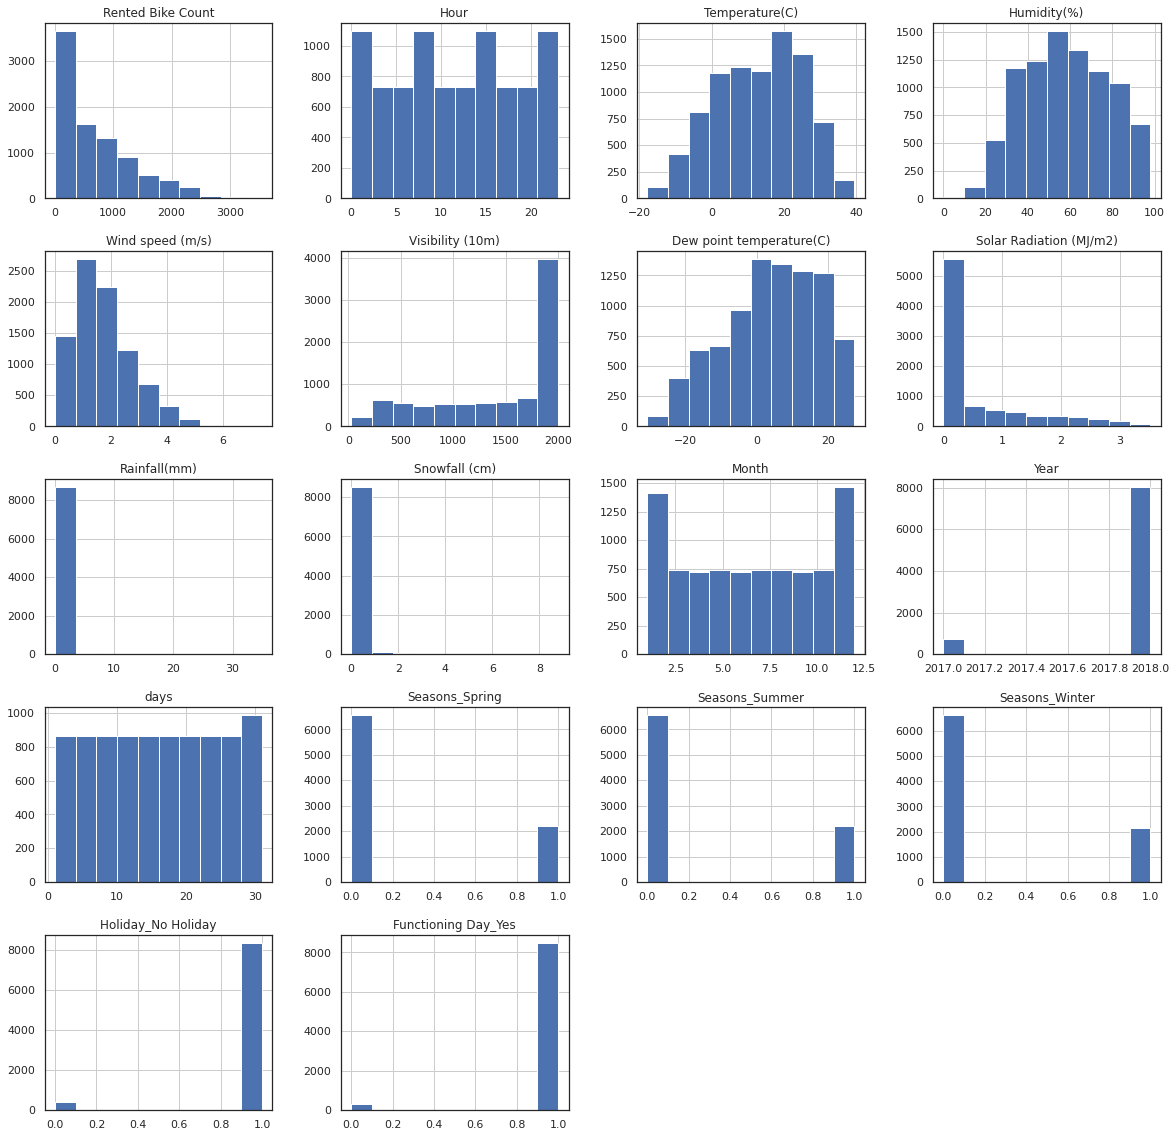

In [20]:
df1.hist(figsize=(20,20))

**Here Are the correlations between Variables**

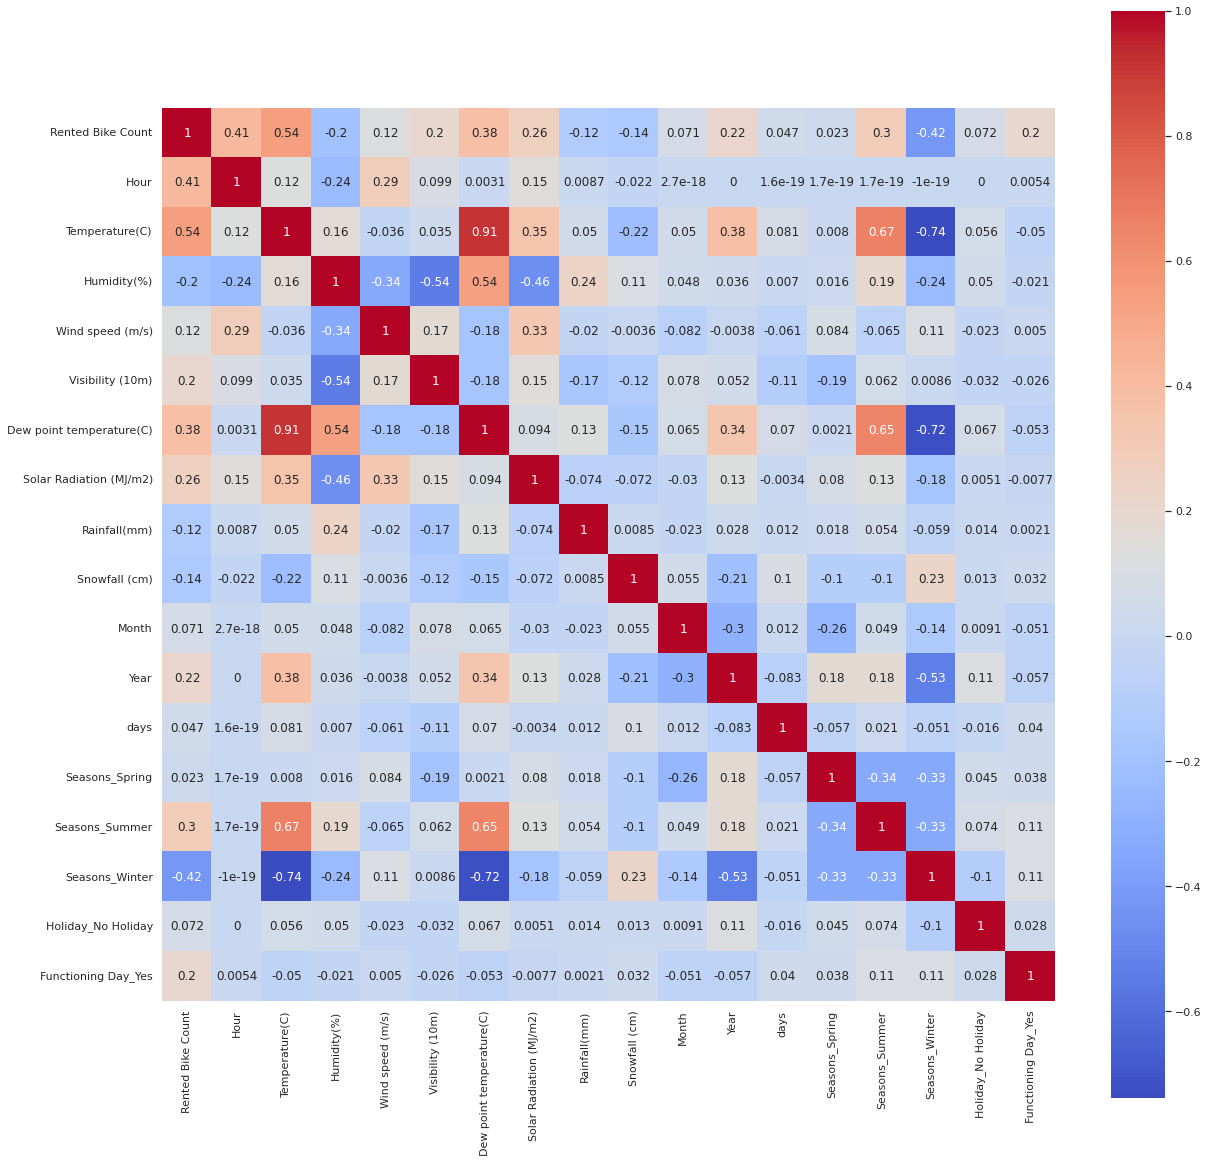

In [21]:
plt.figure(figsize=(20,20))
corr=df1.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',square=True)
plt.show()

Correlation between 'Temperature' and 'Dew Point Temperature' is approx 0.9 so We can drop Dew Point Temperature

In [22]:
df1=df1.drop(['Dew point temperature(C)'],axis=1)

In [23]:
df1Corr=pd.DataFrame(df1.corr().unstack().sort_values(ascending=False)['Rented Bike Count'],columns=['Correlation to the target'])
df1Corr

,Correlation to the target
Rented Bike Count,1.000000
Temperature(C),0.538558
Hour,0.410257
Seasons_Summer,0.296549
Solar Radiation (MJ/m2),0.261837
Year,0.215162
Functioning Day_Yes,0.203943
Visibility (10m),0.199280
Wind speed (m/s),0.121108
Holiday_No Holiday,0.072338


**Step 2 : Data Preparation and Data Visualisation using matplotlib and seaborn**

In [24]:
bike_data['label_day_night']=bike_data['Hour'].apply(lambda x : 'Night' if(x>20 or x<5) else('Day'))

In [25]:
bike_data['WeekDay']=bike_data['Date'].dt.day_name()

In [26]:
bike_data['Month']=bike_data['Date'].dt.month

***Plotting Variables to the Target***

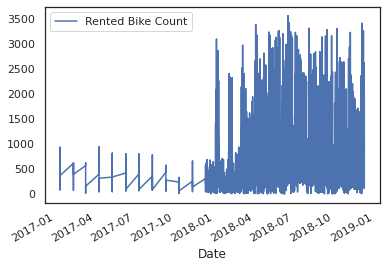

In [27]:
bike_data.plot(x="Date",y='Rented Bike Count',kind='line')

In [28]:
bdSeason=pd.DataFrame(bike_data.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending=False))

In [29]:
bdSeason.style.background_gradient(cmap=sns.light_palette('b',as_cmap=True))

,Rented Bike Count
Seasons,
Summer,2283234
Autumn,1790002
Spring,1611909
Winter,487169


Lets Verify that it is Linked to the Solar Radiation

In [30]:
bdSolar=pd.DataFrame(bike_data.groupby('Seasons').sum()['Solar Radiation (MJ/m2)'].sort_values(ascending=False))

In [31]:
bdSolar.style.background_gradient(cmap=sns.light_palette("red",as_cmap=True))

,Solar Radiation (MJ/m2)
Seasons,
Summer,1680.850000
Spring,1520.840000
Autumn,1139.650000
Winter,644.070000


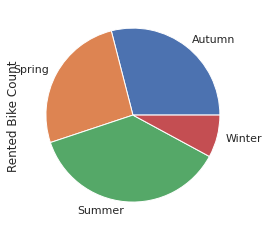

In [32]:
bike_data.groupby('Seasons').sum()['Rented Bike Count'].plot.pie()

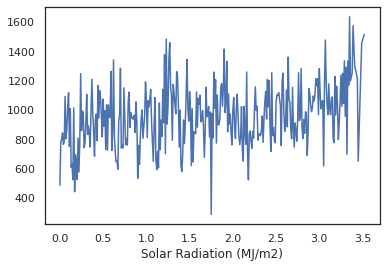

In [33]:
bike_data.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'].plot()

***Here We have a Repartition of the rents by hour, at the beginning of the day we suppose people go to work and return by Bike***

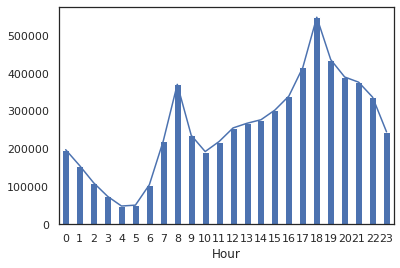

In [34]:
bike_data.groupby("Hour").sum()['Rented Bike Count'].plot.bar()
bike_data.groupby('Hour').sum()['Rented Bike Count'].plot()

**Days With Highest Rented Bike are Week days**

In [35]:
bdDays=pd.DataFrame(bike_data.groupby('WeekDay').sum()['Rented Bike Count'].sort_values(ascending=False))
bdDays.style.background_gradient(cmap=sns.light_palette("red",as_cmap=True))

,Rented Bike Count
WeekDay,
Thursday,928267
Saturday,911475
Wednesday,908871
Friday,898966
Monday,863563
Tuesday,862877
Sunday,798295


People Like to Ride bikes when it is 25 C Temperature 

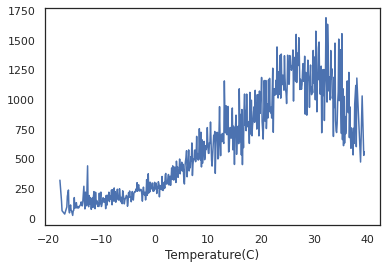

In [36]:
bike_data.groupby('Temperature(C)').mean()['Rented Bike Count'].plot()

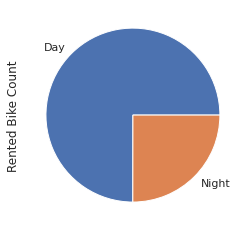

In [37]:
bike_data.groupby('label_day_night').sum()['Rented Bike Count'].plot.pie()

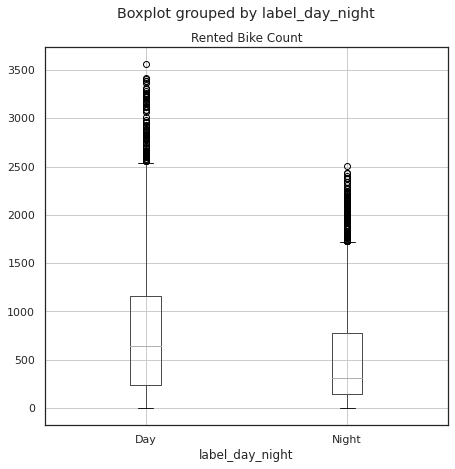

In [38]:
boxplotDay_Night=bike_data.boxplot(['Rented Bike Count'],by='label_day_night',figsize=(7,7))

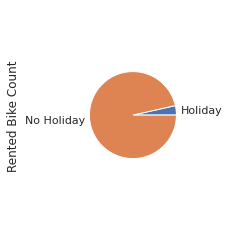

In [39]:
bike_data.groupby('Holiday').sum()['Rented Bike Count'].plot.pie(radius=0.5)

In [40]:
bdHoliday=bike_data.loc[bike_data['Holiday']=='Holiday']

In [41]:
bdHoliday.shape

(432, 19)

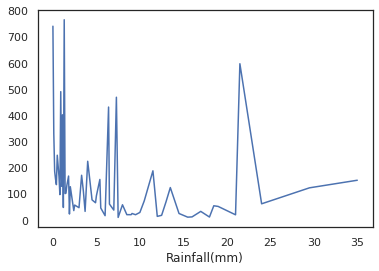

In [42]:
bike_data.groupby("Rainfall(mm)").mean()['Rented Bike Count'].plot()

In [43]:
bike_data.loc[(bike_data['Rainfall(mm)']>20)&(bike_data['Rainfall(mm)']<25)]

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,days,label_day_night,WeekDay
5034,2018-06-28,596,18,20.6,97,0.7,222,20.1,0.14,21.5,0.0,Summer,No Holiday,Yes,6,2018,28,Day,Thursday
5132,2018-02-07,61,20,23.5,97,0.1,1814,22.9,0.04,24.0,0.0,Summer,No Holiday,Yes,2,2018,7,Day,Wednesday
6524,2018-08-29,19,20,23.4,98,0.6,70,23.0,0.00,21.0,0.0,Summer,No Holiday,Yes,8,2018,29,Day,Wednesday


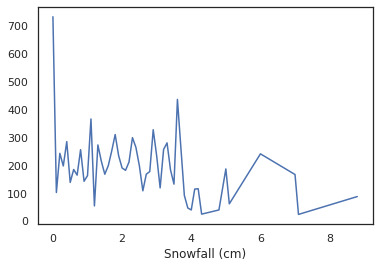

In [44]:
bike_data.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot()

In [45]:
mapping_dictDay={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,"Sunday":7}
bdDays['WeekDays']=bike_data['WeekDay'].map(mapping_dictDay)

In [46]:
df1.shape

(8760, 17)

In [47]:
df1.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Year,days,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,2017,12,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,2017,12,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,2017,12,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,2017,12,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,2017,12,0,0,1,1,1


*** Step 3 Modeling ***

In [57]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [49]:
reporting={}

In [68]:
X=bike_data.drop(['Rented Bike Count','Date','Seasons','Holiday','label_day_night','Functioning Day','WeekDay'],axis=1)
y=bike_data.iloc[:,1]

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [70]:
lr=LinearRegression()
Model=lr.fit(X_train,y_train)
pred_train=lr.predict(X_train)
pred_test=lr.predict(X_test)


In [71]:
df_pred=lr.predict(X_test)
print("MSE",mean_squared_error(df_pred,y_test))
print("R-Squared Score:",r2_score(df_pred,y_test))
print("Accuracry:",lr.score(X_test,y_test))

MSE 214006.9890159853
R-Squared Score: -0.14517876041754985
Accuracry: 0.4721443358500512


In [72]:
print("The Model's Metrics value are:")
print("Accuracy:",lr.score(X_test,y_test))
print("Mean Absolute Error: ",mean_absolute_error(df_pred,y_test))
print("Mean Squared Error: ",mean_squared_error(df_pred,y_test))
print("R-Squared Score: ",r2_score(df_pred, y_test))

The Model's Metrics value are:
Accuracy: 0.4721443358500512
Mean Absolute Error:  340.6324664401453
Mean Squared Error:  214006.9890159853
R-Squared Score:  -0.14517876041754985


In [73]:
from sklearn.linear_model import Ridge

ridge=Ridge()
ridge
ridge.fit(X_train,y_train)
rp=ridge.predict(X_test)
ridge_score=ridge.score(X_test,y_test)
coeff_used = np.sum(ridge.coef_ !=0)
ridge.coef_
print("L2 Regression:")
print("R-Square Score:",r2_score(rp,y_test))
print("Training Score: ",ridge_score)
print("Number of features used : ",coeff_used)

L2 Regression:
R-Square Score: -0.14521973700153
Training Score:  0.4721429715613422
Number of features used :  12


In [74]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train,y_train)
lp=lasso.predict(X_test)
lasso_score=lasso.score(X_test,y_test)
coeff_used=np.sum(lasso.coef_ !=0)
lasso.coef_
print("L1 Regression:")
print("R-Squared Score:",r2_score(lp,y_test))
print("training Score",lasso_score)
print("number of festure Used :", coeff_used)


L1 Regression:
R-Squared Score: -0.14894760956443132
training Score 0.47195085627689337
number of festure Used : 12
